In [23]:
import nest
import matplotlib.pyplot as plt

nest.ResetKernel()

In [24]:
neuron = nest.Create('iaf_psc_alpha',1)

In [25]:
nest.GetStatus(neuron, 'recordables')

(('I_syn_ex', 'I_syn_in', 'V_m'),)

In [26]:
multimeter = nest.Create('multimeter',1, params={'record_from': ['V_m']})

In [27]:
dc_generator = nest.Create('dc_generator', params={'amplitude': 400.0})

In [28]:
nest.Connect(multimeter, neuron)
nest.Connect(dc_generator, neuron)

In [29]:
nest.Simulate(100.0)


Aug 30 20:30:36 NodeManager::prepare_nodes [Info]: 
    Preparing 3 nodes for simulation.

Aug 30 20:30:36 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 3
    Simulation time (ms): 100
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Aug 30 20:30:36 SimulationManager::run [Info]: 
    Simulation finished.


In [30]:
multimeter_events = multimeter.get('events')
senders = multimeter_events['senders']
times = multimeter_events['times']
Vm = multimeter_events['V_m']

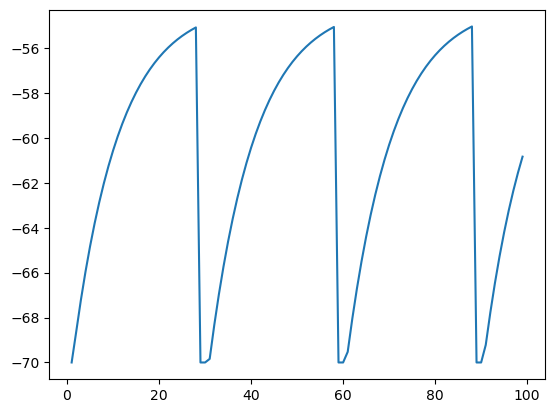

In [31]:
plt.plot(times, Vm)